In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   
plt.rcParams['image.cmap'] = 'gray'
from sklearn.neural_network import BernoulliRBM
import pandas as pd

In [2]:
es, na = utils.load_embeddings("n2v")
na_dummy = na.drop(na.columns[0], axis=1)
na_vectores1 = na_dummy.values.astype(np.float64)
eval_set = utils.get_lexicon("seed")
eval_es = list((eval_set["esp"]))
eval_na = list((eval_set["nah"]))
eval_es_index = [int(es[es[0] == palabra].index[0]) for palabra in eval_es]
eval_na_index = [int(na[na[0] == palabra].index[0]) for palabra in eval_na]

es_vectores = np.array([np.array(es.iloc[indice][1::]).astype(np.float64) for indice in eval_es_index])
na_vectores = np.array([np.array(na.iloc[indice][1::]).astype(np.float64) for indice in eval_na_index])

In [3]:
es_vectores.shape

(496, 128)

In [4]:
es_dummy = es_vectores
na_dummy = na_vectores
for i in range(es_dummy.shape[0]):
    es_vectores=np.vstack((es_vectores,es_dummy[i][::-1]))
    na_vectores=np.vstack((na_vectores,na_dummy[i][::-1]))

In [5]:
es_vectores.shape

(992, 128)

In [27]:
%%time
rbm = BernoulliRBM(n_components=220, learning_rate=.0001, random_state=0, verbose=True,n_iter=10)
rbm.fit(na_vectores)
W1_ = rbm.components_.T
rbm = BernoulliRBM(n_components=100, learning_rate=.0001, random_state=0, verbose=True,n_iter=10)
rbm.fit(W1_)
W2_= rbm.components_.T
rbm = BernoulliRBM(n_components=50, learning_rate=.0001, random_state=0, verbose=True,n_iter=10)
rbm.fit(W2_)
W3_ = rbm.components_.T

[BernoulliRBM] Iteration 1, pseudo-likelihood = -72.31, time = 0.11s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -61.86, time = 0.16s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -54.83, time = 0.13s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -49.87, time = 0.12s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -46.24, time = 0.15s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -43.53, time = 0.12s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -41.41, time = 0.11s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -39.79, time = 0.12s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -38.50, time = 0.10s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -37.46, time = 0.15s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -151.57, time = 0.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -149.65, time = 0.01s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -147.76, time = 0.01s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -145.98, time = 0.01s
[BernoulliRBM] Iteration 5, p

In [23]:
import tensorflow as tf
import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tf.__version__

'1.5.0-rc0'

In [2]:
es, na = utils.load_embeddings("n2v")
na_dummy = na.drop(na.columns[0], axis=1)
na_vectores1 = na_dummy.values.astype(np.float64)
eval_set = utils.get_lexicon("seed")
eval_es = list((eval_set["esp"]))
eval_na = list((eval_set["nah"]))
eval_es_index = [int(es[es[0] == palabra].index[0]) for palabra in eval_es]
eval_na_index = [int(na[na[0] == palabra].index[0]) for palabra in eval_na]

es_vectors = np.array([np.array(es.iloc[indice][1::]).astype(np.float64) for indice in eval_es_index])
na_vectors = np.array([np.array(na.iloc[indice][1::]).astype(np.float64) for indice in eval_na_index])

In [3]:
es_vectors

array([[ 0.167541,  0.196611, -0.977209, ..., -0.202024, -0.037447,
        -0.976046],
       [ 0.741759,  0.10806 , -0.041657, ...,  0.205377, -0.429727,
        -0.826301],
       [-0.169796,  0.322466, -0.54677 , ..., -0.259447, -0.380046,
        -0.387346],
       ..., 
       [-0.154871, -0.047107, -0.355867, ...,  0.092358, -0.355715,
        -0.029153],
       [-0.105675, -0.323174, -0.224538, ..., -0.209881, -0.280836,
        -0.243491],
       [-0.221973, -0.246222, -0.442638, ..., -0.167317,  0.252487,
        -0.048908]])

In [4]:
vb = tf.placeholder(dtype=tf.float64,shape=[128])
hb = tf.placeholder(dtype=tf.float64,shape=[100])

In [5]:
W = tf.placeholder(dtype=tf.float64,shape=[128,100])

In [8]:
X = tf.placeholder(dtype=tf.float64, shape=[None, 128])
_h0= tf.nn.sigmoid(tf.matmul(X, W) + hb)  #probabilities of the hidden units
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0),dtype=tf.float64))) #sample_h_given_X

In [12]:
alpha = 1.0
w_pos_grad = tf.matmul(tf.transpose(X), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)
CD = (w_pos_grad - w_neg_grad) / tf.cast(tf.shape(X)[0],tf.float64)
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(X - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

In [13]:
err = tf.reduce_mean(tf.square(X - v1))

In [14]:
cur_w = np.zeros([128, 100], np.float64)
cur_vb = np.zeros([128], np.float64)
cur_hb = np.zeros([100], np.float64)
prv_w = np.zeros([128, 100], np.float64)
prv_vb = np.zeros([128], np.float64)
prv_hb = np.zeros([100], np.float64)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [15]:
sess.run(err, feed_dict={X: es_vectors, 
                         W: prv_w, 
                         vb: prv_vb, 
                         hb: prv_hb})

0.66237156551219079

Epoch: 0 reconstruction error: 0.207168
Epoch: 100 reconstruction error: 0.192762
Epoch: 200 reconstruction error: 0.181302
Epoch: 300 reconstruction error: 0.189457
Epoch: 400 reconstruction error: 0.197418
Epoch: 500 reconstruction error: 0.190260
Epoch: 600 reconstruction error: 0.211651
Epoch: 700 reconstruction error: 0.218719
Epoch: 800 reconstruction error: 0.201134
Epoch: 900 reconstruction error: 0.201898
Epoch: 1000 reconstruction error: 0.192702
Epoch: 1100 reconstruction error: 0.178025
Epoch: 1200 reconstruction error: 0.211150
Epoch: 1300 reconstruction error: 0.217321
Epoch: 1400 reconstruction error: 0.200165
Epoch: 1500 reconstruction error: 0.214768
Epoch: 1600 reconstruction error: 0.191994
Epoch: 1700 reconstruction error: 0.206874
Epoch: 1800 reconstruction error: 0.193464
Epoch: 1900 reconstruction error: 0.184569
Epoch: 2000 reconstruction error: 0.191206
Epoch: 2100 reconstruction error: 0.215918
Epoch: 2200 reconstruction error: 0.198765
Epoch: 2300 reconstruct

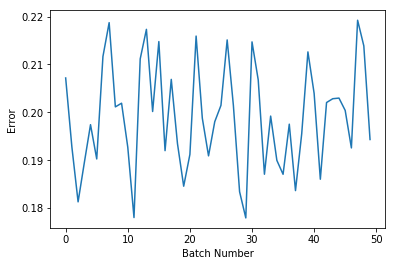

In [25]:
#Parameters
epochs = 5000
batchsize = 100
weights = []
errors = []

for epoch in range(epochs):
    cur_w = sess.run(update_w, feed_dict={ X: es_vectors, W: prv_w, vb: prv_vb, hb: prv_hb})
    cur_vb = sess.run(update_vb, feed_dict={  X: es_vectors, W: prv_w, vb: prv_vb, hb: prv_hb})
    cur_hb = sess.run(update_hb, feed_dict={ X: es_vectors, W: prv_w, vb: prv_vb, hb: prv_hb})
    prv_w = cur_w
    prv_vb = cur_vb
    prv_hb = cur_hb
    if epoch % 100 == 0:
        errors.append(sess.run(err, feed_dict={X: es_vectors, W: cur_w, vb: cur_vb, hb: cur_hb}))
        weights.append(cur_w)
        print ('Epoch: %d' % epoch,'reconstruction error: %f' % errors[-1])
plt.plot(errors)
plt.xlabel("Batch Number")
plt.ylabel("Error")
plt.show()

In [26]:
uw = weights[-1].T

(100, 128)

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import BernoulliRBM
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np
import argparse
import time

In [24]:
es, na = utils.load_embeddings("n2v")
na_dummy = na.drop(na.columns[0], axis=1)
na_vectores1 = na_dummy.values.astype(np.float64)
eval_set = utils.get_lexicon("seed")
eval_es = list((eval_set["esp"]))
eval_na = list((eval_set["nah"]))
eval_es_index = [int(es[es[0] == palabra].index[0]) for palabra in eval_es]
eval_na_index = [int(na[na[0] == palabra].index[0]) for palabra in eval_na]

In [27]:
es_vectors = np.array([np.array(es.iloc[indice][1::]).astype(np.float64) for indice in eval_es_index])
na_vectors = np.array([np.array(na.iloc[indice][1::]).astype(np.float64) for indice in eval_na_index])

In [30]:
es_vectors.shape,na_vectors.shape

((496, 128), (496, 128))

In [76]:
def scale(X, eps = .001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0)+eps)

In [80]:
es_vectores = scale(es_vectors)
na_vectores = scale(na_vectors)

In [84]:
(trainX, testX, trainY, testY) = train_test_split(es_vectores, na_vectores, random_state = 42)

In [91]:
es_vectores.shape,na_vectores.shape

((496, 128), (496, 128))

In [150]:
model = BernoulliRBM(n_iter=100,n_components=200,random_state=42)

In [151]:
model.fit(es_vectors)

BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=200, n_iter=100,
       random_state=42, verbose=0)

In [152]:
W1=model.components_.T

In [ ]:
Weight matrix, where n_features in the number of visible units and n_components is the number of hidden units.

In [153]:
W1.shape

(128, 200)

In [154]:
model = BernoulliRBM(n_iter=100,n_components=110,random_state=42)
model.fit(W1)

BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=110, n_iter=100,
       random_state=42, verbose=0)

In [155]:
W2=model.components_.T

In [162]:
%%time
model = BernoulliRBM(n_iter=500,n_components=70,random_state=42)
model.fit(W2)

CPU times: user 7.11 s, sys: 148 ms, total: 7.25 s
Wall time: 3.68 s


In [157]:
W3 =model.components_.T

In [158]:
es_vectores.shape,W1.shape,W2.shape,W3.shape

((496, 128), (128, 200), (200, 110), (110, 70))